In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dbpath = 'data/fr-en-dnb-par-etablissement.csv'

In [3]:
brevet_data = pd.read_csv(dbpath, sep=';')
brevet_data_no_session = pd.read_csv(dbpath, sep=';')

brevet_data.head()

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Code région,Libellé région,Inscrits,Presents,Admis,Admis sans mention,Nombre_d_admis_Mention_AB,Admis Mention bien,Admis Mention très bien,Taux de réussite
0,2014,0131711P,COLLEGE,ROCHER DU DRAGON,PUBLIC,13001,AIX-EN-PROVENCE,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,163,159,143,52,43,29,19,"89,90%"
1,2014,0131756N,COLLEGE,DARIUS MILHAUD,PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,153,143,109,49,25,21,14,"76,20%"
2,2014,0131923V,COLLEGE,MARSEILLEVEYRE,PUBLIC,13208,MARSEILLE 8E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,262,256,236,63,81,59,33,"92,10%"
3,2014,0131943S,COLLEGE,PIERRE PUGET,PUBLIC,13206,MARSEILLE 6E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,157,153,114,46,31,24,13,"74,50%"
4,2014,0131968U,COLLEGE,CAILLOLS (QUARTIER DES),PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,138,138,106,45,31,20,10,"76,80%"


# Cleaning data

In [4]:
# Remove leading 0 in department code
brevet_data['Code département'] = brevet_data['Code département'].map(lambda x: str(x)[1:])

# Rename mention columns
brevet_data.rename(columns = {'Nombre_d_admis_Mention_AB':'Admis Mention AB', 'Admis Mention bien':'Admis Mention B', 'Admis Mention très bien':'Admis Mention TB'}, inplace = True)

# Recompute success rate
brevet_data['Taux de réussite'] =  brevet_data['Admis'] / brevet_data['Presents']
brevet_data

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Code région,Libellé région,Inscrits,Presents,Admis,Admis sans mention,Admis Mention AB,Admis Mention B,Admis Mention TB,Taux de réussite
0,2014,0131711P,COLLEGE,ROCHER DU DRAGON,PUBLIC,13001,AIX-EN-PROVENCE,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,163,159,143,52,43,29,19,0.899371
1,2014,0131756N,COLLEGE,DARIUS MILHAUD,PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,153,143,109,49,25,21,14,0.762238
2,2014,0131923V,COLLEGE,MARSEILLEVEYRE,PUBLIC,13208,MARSEILLE 8E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,262,256,236,63,81,59,33,0.921875
3,2014,0131943S,COLLEGE,PIERRE PUGET,PUBLIC,13206,MARSEILLE 6E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,157,153,114,46,31,24,13,0.745098
4,2014,0131968U,COLLEGE,CAILLOLS (QUARTIER DES),PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,138,138,106,45,31,20,10,0.768116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130759,2020,0930623X,COLLEGE,JEAN MOULIN,PUBLIC,93049,NEUILLY-PLAISANCE,93,SEINE-SAINT-DENIS,24,...,10,ILE-DE-FRANCE,190,190,166,40,30,36,60,0.873684
130760,2020,0930831Y,LYCEE PROFESSIONNEL,ARISTIDE BRIAND,PUBLIC,93007,LE BLANC-MESNIL,93,SEINE-SAINT-DENIS,24,...,10,ILE-DE-FRANCE,19,19,17,9,4,2,2,0.894737
130761,2020,0930858C,COLLEGE,PABLO NERUDA,PUBLIC,93032,GAGNY,93,SEINE-SAINT-DENIS,24,...,10,ILE-DE-FRANCE,146,146,114,32,27,24,31,0.780822
130762,2020,0930920V,COLLEGE,SAINTE MARIE,PRIVE,93072,STAINS,93,SEINE-SAINT-DENIS,24,...,10,ILE-DE-FRANCE,110,110,104,25,31,25,23,0.945455


In [5]:
brevet_data2 = brevet_data.set_index(['Session', "Numero d'etablissement"])
brevet_data2

Type d'etablissement  \
Session Numero d'etablissement                        
2014    0131711P                            COLLEGE   
        0131756N                            COLLEGE   
        0131923V                            COLLEGE   
        0131943S                            COLLEGE   
        0131968U                            COLLEGE   
...                                             ...   
2020    0930623X                            COLLEGE   
        0930831Y                LYCEE PROFESSIONNEL   
        0930858C                            COLLEGE   
        0930920V                            COLLEGE   
        0930969Y                            COLLEGE   

                                                  Patronyme  \
Session Numero d'etablissement                                
2014    0131711P                           ROCHER DU DRAGON   
        0131756N                             DARIUS MILHAUD   
        0131923V                             MARSEILLEVEYRE   
        0131943S                               PIERRE PUGET   
        0131968U                    CAILLOLS (QUARTIER DES)   
...                                                     ...   
2020    0930623X                                JEAN MOULIN   
        0930831Y                            ARISTIDE BRIAND   
        0930858C                               PABLO NERUDA   
        0930920V                               SAINTE MARIE   
        0930969Y                SAINT LOUIS-SAINTE CLOTILDE   

                               Secteur d'enseignement Commune  \
Session Numero d'etablissement                                  
2014    0131711P                               PUBLIC   13001   
        0131756N                               PUBLIC   13212   
        0131923V                               PUBLIC   13208   
        0131943S                               PUBLIC   13206   
        0131968U                               PUBLIC   13212   
...                                               ...     ...   
2020    0930623X                               PUBLIC   93049   
        0930831Y                               PUBLIC   93007   
        0930858C                               PUBLIC   93032   
        0930920V                                PRIVE   93072   
        0930969Y                                PRIVE   93062   

                                              Libellé commune  \
Session Numero d'etablissement                                  
2014    0131711P                              AIX-EN-PROVENCE   
        0131756N                MARSEILLE 12E  ARRONDISSEMENT   
        0131923V                 MARSEILLE 8E  ARRONDISSEMENT   
        0131943S                MARSEILLE  6E  ARRONDISSEMENT   
        0131968U                MARSEILLE 12E  ARRONDISSEMENT   
...                                                       ...   
2020    0930623X                            NEUILLY-PLAISANCE   
        0930831Y                              LE BLANC-MESNIL   
        0930858C                                        GAGNY   
        0930920V                                       STAINS   
        0930969Y                                    LE RAINCY   

                               Code département Libellé département  \
Session Numero d'etablissement                                        
2014    0131711P                             13    BOUCHES-DU-RHONE   
        0131756N                             13    BOUCHES-DU-RHONE   
        0131923V                             13    BOUCHES-DU-RHONE   
        0131943S                             13    BOUCHES-DU-RHONE   
        0131968U                             13    BOUCHES-DU-RHONE   
...                                         ...                 ...   
2020    0930623X                             93   SEINE-SAINT-DENIS   
        0930831Y                             93   SEINE-SAINT-DENIS   
        0930858C                             93   SEINE-SAINT-DENIS   
        0930920V      

In [6]:
brevet_data[brevet_data["Patronyme"] == "LES FRANCS BOURGEOIS"]

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Code région,Libellé région,Inscrits,Presents,Admis,Admis sans mention,Admis Mention AB,Admis Mention B,Admis Mention TB,Taux de réussite
13455,2013,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,240,240,240,15,78,99,48,1.000000
14479,2009,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,231,230,228,30,85,88,25,0.991304
17711,2020,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,260,260,260,20,41,102,97,1.000000
40071,2014,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,258,258,258,29,81,101,47,1.000000
41923,2011,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,249,249,248,26,104,90,28,0.995984
57939,2012,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,246,246,245,17,65,102,61,0.995935
65156,2007,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,234,231,228,30,69,90,39,0.987013
73468,2017,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,255,255,254,36,34,75,109,0.996078
93499,2008,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,236,235,234,33,97,81,23,0.995745
109022,2010,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,248,247,246,22,89,93,42,0.995951


In [7]:
import folium

In [8]:
france = folium.Map(location=[46.5,2], zoom_start=5, tiles='Stamen Toner')

colors = folium.Choropleth(geo_data = 'data/departements-version-simplifiee.geojson',
                           data = brevet_data,
                           columns = ['Code département', 'Taux de réussite'],
                           key_on = 'feature.properties.code',
                           fill_color = 'YlOrRd',
                           fill_opacity = 0.6,
                           line_opacity = 0.2,
                           legend_name = "Taux de réussite"
                          )
colors.add_to(france)
folium.LayerControl().add_to(france)
france

## Number of students per session

In [9]:
brevet_data.groupby('Session')['Presents'].sum()

Session
2006    746534
2007    736961
2008    716484
2009    709965
2010    724086
2011    742462
2012    757587
2013    759891
2014    772825
2015    800531
2016    800995
2017    798720
2018    796930
2019    804116
2020    829164
Name: Presents, dtype: int64

# Number of students in 2016

In [10]:
brevet_data.loc[[2016]]['Presents'].sum()

151

# Taux de réussite par secteur (privé/public)

In [11]:
brevet_data.groupby('Secteur d\'enseignement')['Admis'].sum() / brevet_data.groupby('Secteur d\'enseignement')['Presents'].sum()

Secteur d'enseignement
-         0.833316
PRIVE     0.938826
PUBLIC    0.832538
dtype: float64

In [66]:
taux_reussite_par_annee_par_secteur = brevet_data.groupby(['Session', 'Secteur d\'enseignement'])['Admis'].sum() / brevet_data.groupby(['Session', 'Secteur d\'enseignement'])['Presents'].sum()
taux_reussite_par_annee_par_secteur = taux_reussite_par_annee_par_secteur.to_frame().reset_index()
taux_reussite_par_annee_par_secteur.columns.values[2] = "Taux de réussite"
taux_reussite_par_annee_par_secteur = taux_reussite_par_annee_par_secteur.drop(taux_reussite_par_annee_par_secteur[taux_reussite_par_annee_par_secteur["Secteur d'enseignement"] == "-"].index)
taux_reussite_par_annee_par_secteur

,Session,Secteur d'enseignement,Taux de réussite
1,2006,PRIVE,0.899843
2,2006,PUBLIC,0.763333
4,2007,PRIVE,0.916789
5,2007,PUBLIC,0.798388
7,2008,PRIVE,0.919680
8,2008,PUBLIC,0.804895
10,2009,PRIVE,0.927271
11,2009,PUBLIC,0.810302
13,2010,PRIVE,0.930900
14,2010,PUBLIC,0.818248


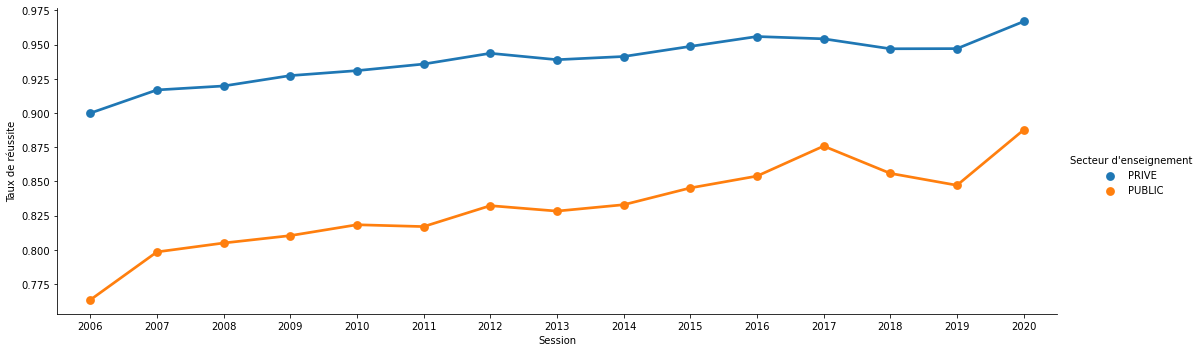

In [67]:
import seaborn as sns
sns.catplot(data=taux_reussite_par_annee_par_secteur,x='Session',hue="Secteur d'enseignement", y = "Taux de réussite", kind = 'point', aspect = 3)

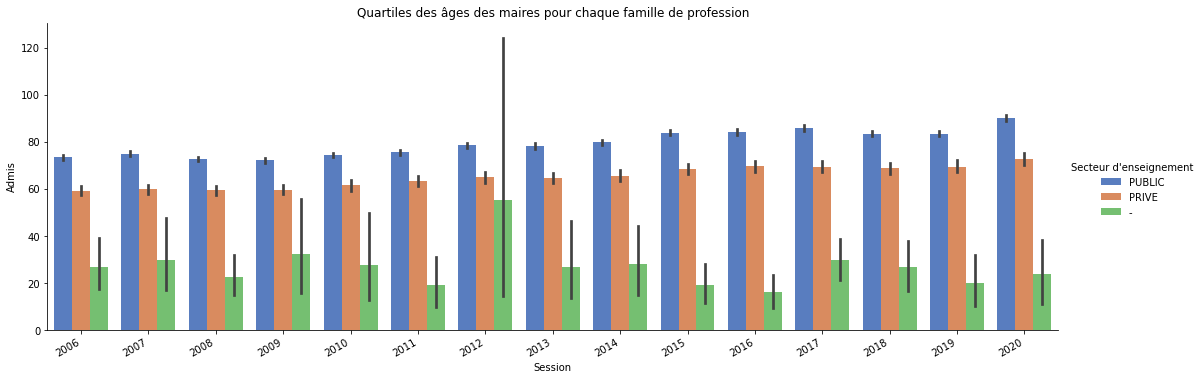

In [32]:
g = sns.catplot(data=brevet_data, x='Session', y="Admis", hue="Secteur d'enseignement", palette="muted", 
                kind='bar', aspect=3)
g.set(title="Quartiles des âges des maires pour chaque famille de profession") # Mayors' age-sex pyramid for each type of professions
g.set_xticklabels(rotation=30, ha='right')

In [14]:
réussite_secteur = brevet_data.groupby('Secteur d\'enseignement')['Taux de réussite'].mean()
réussite_secteur 

Secteur d'enseignement
-         0.773388
PRIVE     0.904286
PUBLIC    0.828145
Name: Taux de réussite, dtype: float64

<BarContainer object of 2 artists>

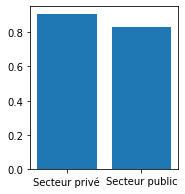

In [15]:
names = ['Secteur privé', 'Secteur public']
values = [réussite_secteur['PRIVE'], réussite_secteur['PUBLIC']]

plt.figure(figsize=(9, 3))
plt.ylabel("Taux de réussite au brevet")
plt.subplot(131)
plt.bar(names, values)

# Nombre d'inscrits par secteur

In [16]:
inscrits_secteur = brevet_data.groupby('Secteur d\'enseignement')['Inscrits'].sum()
inscrits_secteur

Secteur d'enseignement
-           10464
PRIVE     2638965
PUBLIC    9040378
Name: Inscrits, dtype: int64

# Calcul du nombre d'inscrits au brevet dans les 10 plus grandes villes

In [17]:
grandes_villes = ["PARIS","MARSEILLE","LYON","TOULOUSE","NICE",
 "NANTES","MONTPELLIER","STRASBOURG","BORDEAUX","LILLE"]

In [18]:
inscrits_par_ville = []
for ville in grandes_villes:
    ## pour chaque ville je calcule le nombre d'inscrits par année depuis 2006
    sub_df = brevet_data.loc[brevet_data['Libellé commune'].str.contains(ville)]
    sum = sub_df.groupby('Session')['Inscrits'].sum()
    inscrits_par_ville.append(sum)

<AxesSubplot:xlabel='Session'>

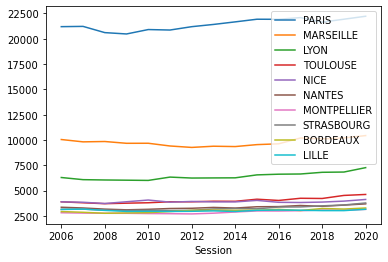

In [19]:
inscrits_par_ville_df = pd.concat(inscrits_par_ville, axis=1, keys=[s.name for s in inscrits_par_ville])
inscrits_par_ville_df.columns = grandes_villes
inscrits_par_ville_df.plot()

In [20]:
inscrits_par_ville_df['Total'] = inscrits_par_ville_df.sum(axis=1)
inscrits_par_ville_df

,PARIS,MARSEILLE,LYON,TOULOUSE,NICE,NANTES,MONTPELLIER,STRASBOURG,BORDEAUX,LILLE,Total
Session,,,,,,,,,,,
2006,21196,10045,6292,3891,3888,3355,2810,3154,2929,3135,60695
2007,21223,9815,6080,3796,3846,3281,2779,3172,2856,3169,60017
2008,20608,9849,6048,3706,3723,3169,2758,3064,2759,3041,58725
2009,20474,9672,6027,3756,3896,3100,2756,3042,2788,2943,58454
2010,20910,9676,6005,3798,4067,3150,2729,3060,2816,2951,59162
2011,20863,9407,6333,3896,3857,3230,2718,3029,2930,2939,59202
2012,21194,9265,6239,3892,3925,3253,2695,3053,3044,2953,59513
2013,21415,9383,6251,3949,3882,3337,2767,3186,3067,2994,60231
2014,21669,9349,6261,3941,3882,3274,2883,3227,3047,2936,60469
